# 04-5 막대그래프
- axes.bar()

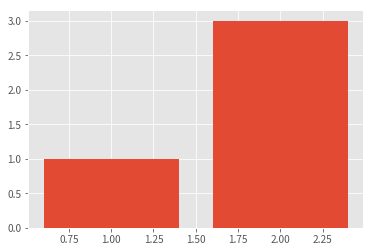

In [3]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111)

x = [1,2]
y = [1,3]

ax.bar(x, y)

plt.show()

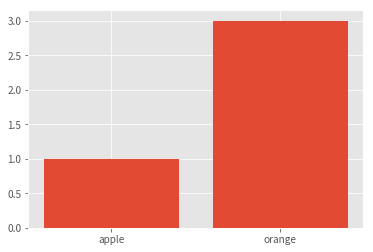

In [4]:
# 횡축의 눈금에 레이블 설정
fig = plt.figure()
ax = fig.add_subplot(111)

labels = ['apple','orange']
ax.bar(x, y, tick_label = labels)

plt.show()

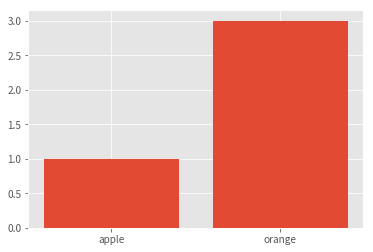

In [7]:
# 그린 후에 문자열레이블 추가
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(x, y)

# x축의 축눈금과 축눈금 레이블
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

수평 막대그래프를 작성하는 경우

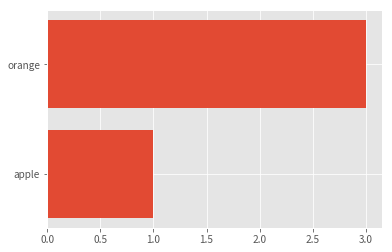

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.barh(x, y, tick_label=labels)

plt.show()

## 막대그래프 활용하기

In [10]:
import os
import pandas as pd

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_master_csv = os.path.join(base_url, 'anime_master.csv')
dfac = pd.read_csv(anime_master_csv)
dfac.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


배급종별마다의 멤버수의 합계값을 추출해서 막대그래프로 그려보자
 - x값은 배급종별, y값은 배급종별마다의 합계 맴버수
 - x -> len()함수로 데이터수를 계수하고 range()로 그범위의 정수열을 생성
 - x축레이블에는 series의 인덱스를 부여

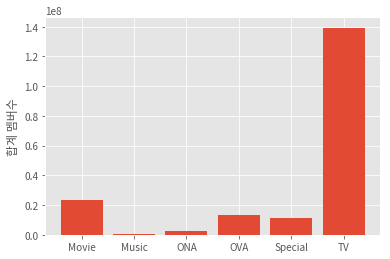

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

y = dfac.groupby('type').sum()['members']
x = range(len(y))

xlabels = y.index
ax.bar(x, y, tick_label=xlabels)
ax.set_ylabel('합계 멤버수')

plt.show()

여러가지 그룹에 대한 막대그래프 작성하기

<Figure size 432x288 with 0 Axes>

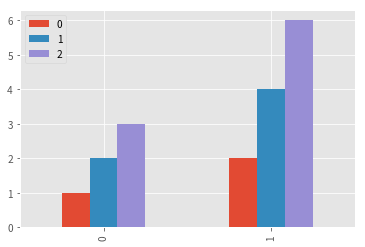

In [20]:
import numpy as np

x = [1,2]
y1, y2, y3 = [1,2],[2,4],[3,6]

fig = plt.figure()
# ax = add_subplot(111)
df = pd.DataFrame([y1, y2, y3])
df

df.T.plot.bar()

plt.show()

여러 그룹의 막대그래프 활용하기

In [22]:
base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_genre_top10_pivoted_csv = os.path.join(base_url, 'anime_genre_top10_pivoted.csv')

dfag = pd.read_csv(anime_genre_top10_pivoted_csv, index_col='genre')
dfag.head()

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0


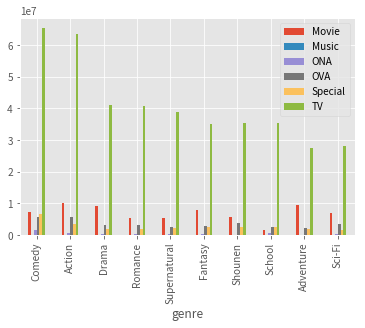

In [24]:
# 배급종별 장르별 막대그래프 그리기(df.plot.bar 이용)
dfag.plot.bar()

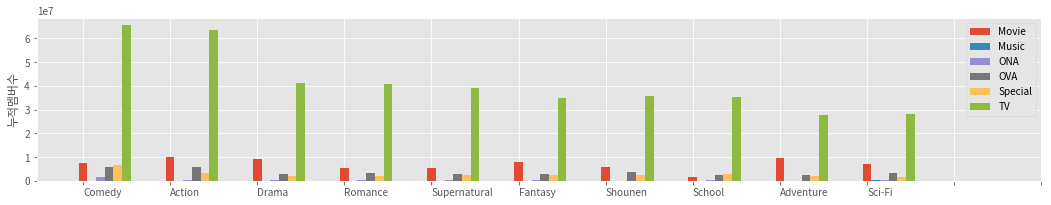

In [28]:
# 배급종별 장르별 막대그래프 그리기(ax.bar이용)
fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(111)

wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
    ax.bar(wt, dfag[i], width = w, label=i)
    wt = wt + w
    
ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha = 'left')
ax.set_ylabel('누적멤버수')
ax.legend()

plt.show()

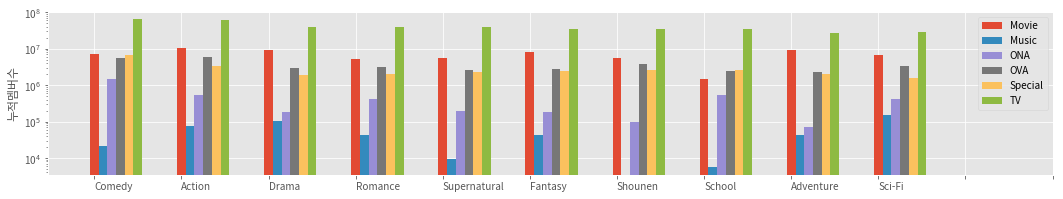

In [29]:
# 가독성을 좋게 하기 위해 log scale로 그림
fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(111)

wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
    ax.bar(wt, dfag[i], width = w, label=i)
    wt = wt + w
    
ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha = 'left')
ax.set_ylabel('누적멤버수')
ax.set_yscale('log')
ax.legend()

plt.show()

누적 막대그래프 작성하기
1. y1, y2, y3의 합을 그린다.
2. y2, y3의 합을 겹쳐서 그린다
3. y1을 겹쳐서 그린다.

(※ 간단하게 작성하는 방법은 plot.bar()의 stacked=True를 지정하면 된다)

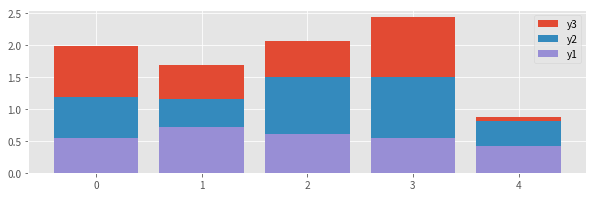

In [41]:
# 데이터 셋트 작성
x = np.arange(5)
np.random.seed(0)
y = np.random.rand(15).reshape((3,5))
y1, y2, y3 = y

y1b = np.array(y1)
y2b = y1b + np.array(y2)
y3b = y2b + np.array(y3)

# 누적막대그래프 그리기
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

ax.bar(x, y3b, label='y3')
ax.bar(x, y2b, label='y2')
ax.bar(x, y1b, label='y1')

ax.legend()

plt.show()

누적 막대그래프 활용하기

In [43]:
dfag

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0


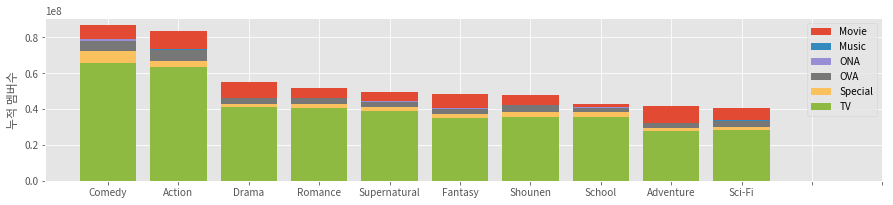

In [45]:
# 배급종별 장르별 막대그래프 그리기
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)

rows, cols = len(dfag), len(dfag.columns)
x = range(rows)

for i, t in enumerate(dfag.columns):
    # i열부터 마지막까지의 합을 계산
    y = dfag.iloc[:, i: cols].sum(axis=1)
    
    ax.bar(x, y, label=t)
    
ax.set_xticks(range(rows + 2))
ax.set_xticklabels(dfag.index)
ax.set_ylabel('누적 멤버수')
ax.legend()

plt.show()